## Task: Predict Carbon Emissions Based on Satellite Observations

* You are provided with a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* Your objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

* Your target is the column: "emission".

* You are provided with the code to download and load the csv file.

* Your work will be evaluated based on the completion of the given tasks below.

* You are allowed to use any models or libraries you want.
    
---


In [13]:
import pandas as pd
import gdown
import kagglehub
import os
import math
# This line imports the math module, which provides mathematical functions.

import numpy as np
# This line imports the numpy library, which is used for numerical operations,
# and gives it the alias 'np' for convenience.

import matplotlib.pyplot as plt
# This line imports the matplotlib.pyplot module, used for plotting, and gives
# it the alias 'plt'.

# Sklearn has implementations of multiple types of models. We'll be using LinearRegression API in it
# For documentation on LinearRegression, visit here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
# This line imports the LinearRegression class from the sklearn.linear_model
# module, which is used to perform linear regression.
# Link to documentation provided for further reference

In [5]:
path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

100%|██████████| 37.6M/37.6M [00:00<00:00, 192MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


In [6]:
csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [9]:
# 1. TODO
data=data.drop("ID_LAT_LON_YEAR_WEEK",axis=1)

KeyError: "['ID_LAT_LON_YEAR_WEEK'] not found in axis"

2. Check for the missing values and handle them.


In [10]:
# 2. TODO
missing_values=data.isnull().sum()
print("Missing values")
print(missing_values)

Missing values
latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 75, dtype: int64


3. Plot the "emission" histogram.

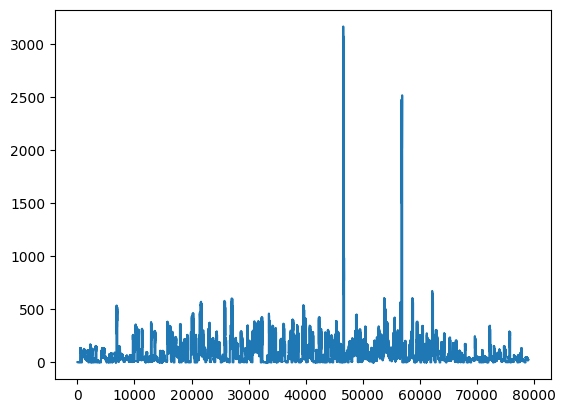

In [14]:
# 3. TODO
plt.plot(data["emission"])

4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

In [ ]:
# 4. TODO
_,ylim_top=plt

# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [17]:
# 1. TODO
data["Location"]=str(data["longitude"]+data["latitude"])

2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [18]:
# 2. TODO
aggregates=data.groupby("Location/emission").agg({
    'Avg. per location'['mean','mean']
})
aggregates

<>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-18-39f2b1dffe91>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  'Avg. per location'['mean','mean']


KeyError: 'Location/emission'

3. Use Label encoder to encode all the categorical features

In [ ]:
# 3. TODO
aggregates.columns=["the average emissions per location"]
data=data.merge(aggregates,on="Location/emission",how="left")
data

# Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mpg_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

df = mpg_df[['mpg', 'weight']]
df

y = mpg_df.mpg
X = mpg_df[['weight']]

#fitting
model_lr = LinearRegression()
model_lr.fit(X, y)

model_lr

#results
model.lr.coef_
model.lr.intercept_

#predictions
y_pred = model_lr.predict(X)
#model_lr.predict(df[['weight']])

#variance explained
r2_score(
      y_true = df.mpg,
      y_pred = model_lr.predict(df[['weight']])
)


### Baseline:

1. Create a baseline using the "emission" median and calculate MAE score.

In [20]:
# 1. TODO

2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [ ]:
# 2. TODO


3. Train a LGBMRegressor on the training data.

In [ ]:
# 3. TODO


4. Evaluate the Model on the validation data Using MAE

In [ ]:
# 4. TODO


5. Plot the features importance of your model.

In [ ]:
# 5. TODO


6. Plot the validation predictions using a histogram.

In [ ]:
# 6. TODO

Good luck in the exam x)

Prepared by: Mohamed Eltayeb
